# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Eleazar Jose Mora ID 417797
    
    2. Rebeca Ferreira ID 421460
    
    3. Emania Raouf ID 375192

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [1]:
# Your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Dataset = pd.read_csv("dataset.csv")
length_dataset = len(Dataset)
sampled_data = Dataset.sample(frac=0.95, random_state=417797)
print(length_dataset, len(sampled_data))

940635 893603


In [2]:
sampled_data.head(5)
sampled_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DAY_YEARLY', 'WEEK', 'SCHEDULED_DEPARTURE_CATEGORY'],
      dtype='object')

## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [3]:
# Your code
print(np.unique(sampled_data["CANCELLATION_REASON"]))
cancelled_flights = sampled_data[sampled_data["CANCELLED"] == 1]
print(np.unique(cancelled_flights["CANCELLATION_REASON"]))

['A' 'B' 'C' 'D' 'N']
['A' 'B' 'C' 'D']


    Your answer:
    Cancelation reasons:
    ['A' 'B' 'C' 'D' 'N']
    Cancellation reasons for cancelled flights:
    ['A' 'B' 'C' 'D']
    Explanation:
    The N label means that the flight was not cancelled

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [4]:
# Your code
no_null_data = sampled_data.dropna()
print(np.unique(no_null_data["CANCELLATION_REASON"]))


['N']


    Your answer:
    Cancellation reasons:
    ['N']
    Explanation:
    All Cancelled flights show a 0 (null value) in the CANCELLED row. Therefore they were dropped from the dataset
    

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

<ipython-input-5-705b10cdcb08>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  ev_data = ev_data[ev_data["DEPARTURE_DELAY"].between(2, 6, inclusive=True)]


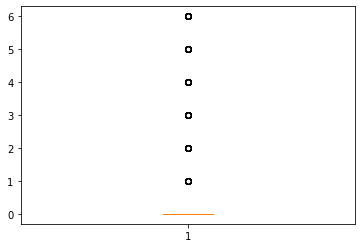

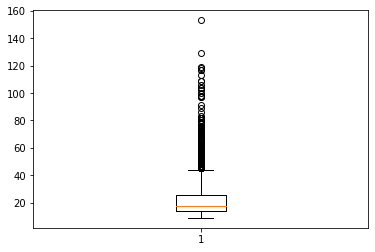

whiskers: [array([14.,  9.]), array([26., 44.])]

caps: [array([9., 9.]), array([44., 44.])]

boxes: [array([14., 14., 26., 26., 14.])]

medians: [array([18., 18.])]

fliers: [array([ 46.,  48.,  60.,  69.,  82.,  60.,  57.,  58.,  75.,  78.,  61.,
        49.,  52.,  68.,  58.,  67.,  71.,  67.,  45.,  71.,  51.,  61.,
        52.,  52., 106., 104.,  65.,  62.,  54.,  73.,  58.,  64.,  58.,
        50.,  48., 129.,  60.,  47.,  64.,  80.,  50.,  71.,  45.,  52.,
        52.,  53.,  65.,  82.,  67.,  98.,  51.,  52.,  49.,  45.,  45.,
        74.,  97.,  46.,  51.,  53.,  49.,  48.,  97.,  49.,  50., 153.,
        53.,  69.,  47.,  59.,  53.,  65.,  46.,  58.,  49.,  53.,  45.,
        52.,  62.,  72.,  70.,  46.,  72.,  89., 117.,  53., 100.,  55.,
        83.,  50.,  74.,  63.,  69.,  45.,  48.,  50.,  51.,  52.,  49.,
        60.,  65.,  71.,  58.,  62.,  54.,  48., 118.,  45.,  78.,  55.,
        50.,  70.,  58.,  50.,  61.,  46.,  60.,  51.,  45.,  46.,  48.,
        50.,  80.,  7

In [5]:
# Your code
ev_data = no_null_data[no_null_data["AIRLINE"] == "EV"]
ev_data = ev_data[ev_data["DEPARTURE_DELAY"].between(2, 6, inclusive=True)]

plt.boxplot(ev_data["LATE_AIRCRAFT_DELAY"])
plt.show()
indexes1 = ev_data[ev_data["LATE_AIRCRAFT_DELAY"] > 0].index
cleaned_data_late_aircraft = ev_data.drop(indexes1)

      
bp = plt.boxplot(ev_data["AIR_SYSTEM_DELAY"])
plt.show()
indexes2 = ev_data[ev_data["LATE_AIRCRAFT_DELAY"] > 44].index
cleaned_data_air_system = ev_data.drop(indexes2)

for key in bp:
    print(f'{key}: {[item.get_ydata() for item in bp[key]]}\n')

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [6]:
# Your code
features = [ev_data, cleaned_data_late_aircraft, cleaned_data_air_system]
names = ["ev_data", "cleaned_data_late_aircraft", "cleaned_data_air_system"]
j=0
for i in features:
    print(names[j],"mean:",i["ARRIVAL_DELAY"].mean(),
         "median:",i["ARRIVAL_DELAY"].median(),
         "mode:",i["ARRIVAL_DELAY"].mode(),
         "std:",np.std(i["ARRIVAL_DELAY"]),
         "variance:",np.var(i["ARRIVAL_DELAY"]), "\n")
    j += 1


ev_data mean: 26.58316566063045 median: 22.0 mode: 0    15.0
dtype: float64 std: 14.246781496303218 variance: 202.97078300340775 

cleaned_data_late_aircraft mean: 27.30827067669173 median: 23.0 mode: 0    15.0
dtype: float64 std: 14.66068880569943 variance: 214.93579625756058 

cleaned_data_air_system mean: 26.58316566063045 median: 22.0 mode: 0    15.0
dtype: float64 std: 14.246781496303218 variance: 202.97078300340775 



    Your answer: 
    All 3 data are very similar
   

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

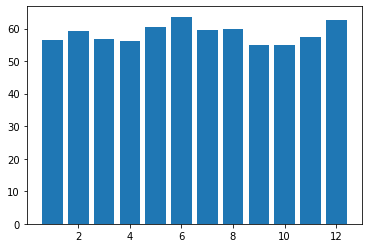

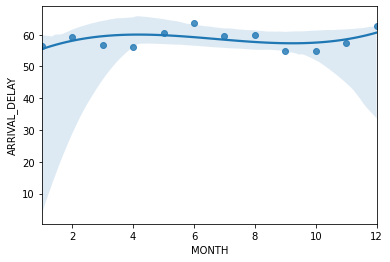

In [7]:
# Your code
mean_month = no_null_data.groupby(["MONTH"])["ARRIVAL_DELAY"].mean().reset_index()
plt.bar(mean_month["MONTH"], mean_month["ARRIVAL_DELAY"])
plt.show()
sns.regplot(mean_month["MONTH"], mean_month["ARRIVAL_DELAY"], order=3)

    Your answer:
    Minimum Delay: September, October
    Maximun Delay: June, December


#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

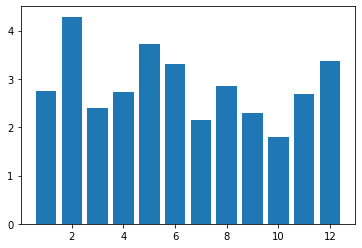

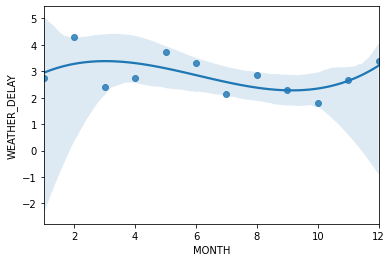

In [8]:
# Your code
mean_month = no_null_data.groupby(["MONTH"])["WEATHER_DELAY"].mean().reset_index()
plt.bar(mean_month["MONTH"], mean_month["WEATHER_DELAY"])
plt.show()
sns.regplot(mean_month["MONTH"], mean_month["WEATHER_DELAY"], order=3)

    Your answer:
    October has the minimum delay
    February has the maximum delay

#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer:
    the graphs seem to be related. If we fit a curve thorugh both of them, the curve has a similar shape

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

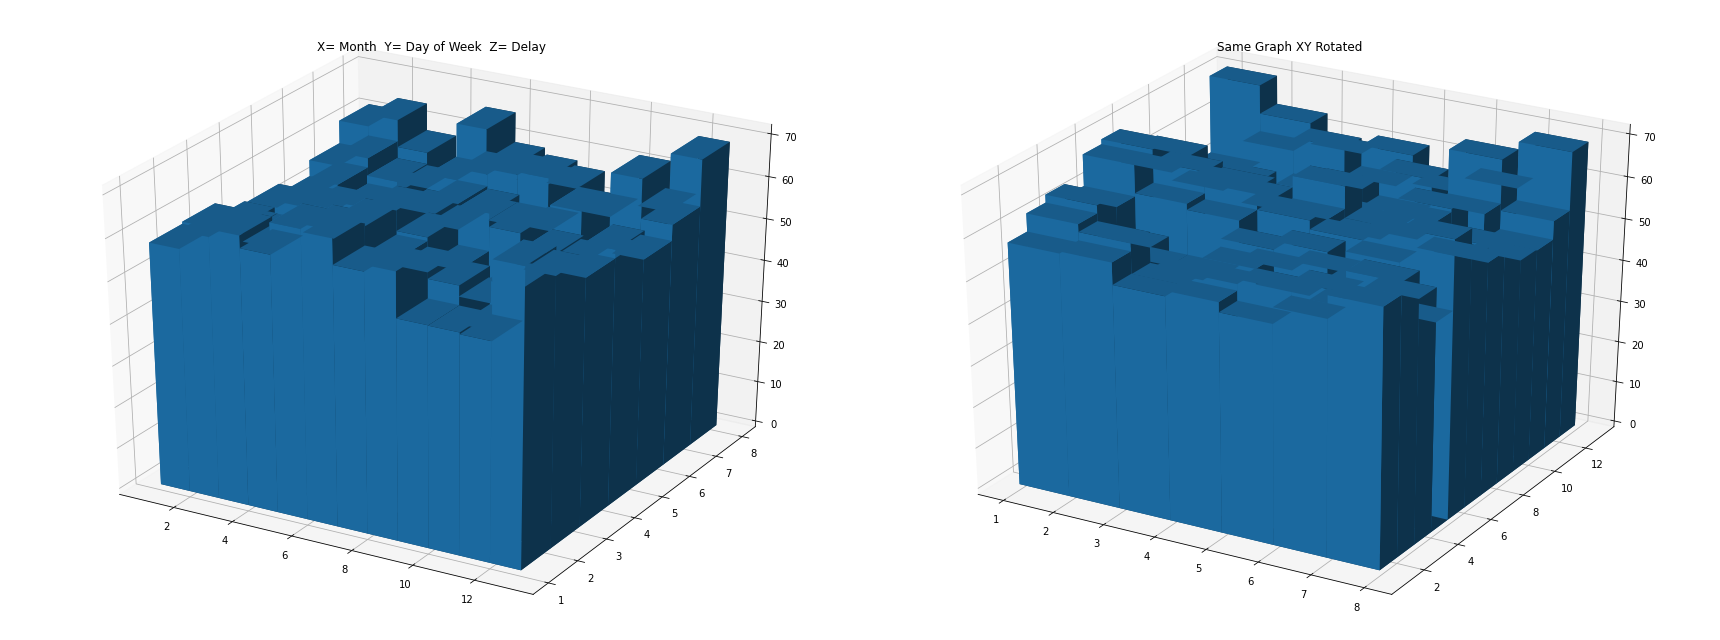

    MONTH  DAY_OF_WEEK  ARRIVAL_DELAY
64     10            2      48.498552
58      9            3      48.741555
27      4            7      50.071662
23      4            3      50.170405
22      4            2      50.171626
..    ...          ...            ...
75     11            6      67.322769
28      5            1      68.664697
83     12            7      69.020977
35      6            1      69.795795
77     12            1      70.735056

[84 rows x 3 columns]


In [9]:
# Your code
mean_month = no_null_data.groupby(["MONTH", "DAY_OF_WEEK"])["ARRIVAL_DELAY"].mean().reset_index()

fig = plt.figure(figsize=(24, 9))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

x = mean_month["MONTH"]
y = mean_month["DAY_OF_WEEK"]
top = mean_month["ARRIVAL_DELAY"]
bottom = np.zeros_like(top)
width = depth = 1 

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('X= Month  Y= Day of Week  Z= Delay')

ax2.bar3d(y, x, bottom, width, depth, top, shade=True)
ax2.set_title('Same Graph XY Rotated')
plt.tight_layout()
plt.show()
print(mean_month.sort_values(["ARRIVAL_DELAY"]))


    Your answer:
1.- Tuesdays in October
2.- Wednesdays in September
3.- Sundays in April
4.- Wednesdays in April
5.- Tuesdays in April

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

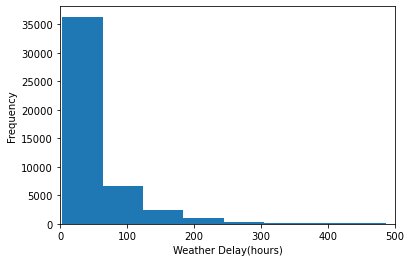

In [10]:
# Your code
dist_weather = no_null_data[(no_null_data["WEATHER_DELAY"] >= 3)]
plt.hist(dist_weather["WEATHER_DELAY"], bins = 20)
plt.xlim([0,500])
plt.xlabel("Weather Delay(hours)")
plt.ylabel("Frequency")
plt.show()

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

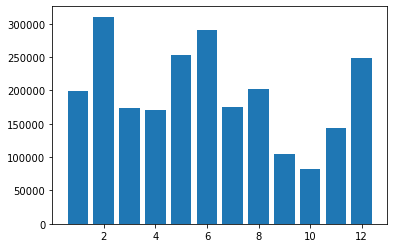

In [11]:
# Your code
mean_month_weather = dist_weather.groupby(["MONTH"])[["WEATHER_DELAY"]].sum().reset_index()
plt.bar(mean_month_weather["MONTH"], mean_month_weather["WEATHER_DELAY"])
plt.show()

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

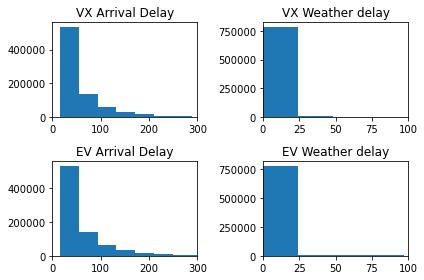

In [12]:
# Your code
# Create Dataset
ev_data = no_null_data[no_null_data["AIRLINE"] == "EV"]
vx_data = no_null_data[no_null_data["AIRLINE"] == "VX"]
ev_data = no_null_data[no_null_data["ARRIVAL_DELAY"] > 6]
vx_data = no_null_data[no_null_data["ARRIVAL_DELAY"] > 6]

# Create Subplots
ax1 = plt.subplot(2,2,1)
ax1.hist(vx_data["ARRIVAL_DELAY"], bins = 50)
ax1.set_title("VX Arrival Delay")
ax1.set_xlim([0, 300])


ax2 = plt.subplot(2,2,2)
ax2.hist(vx_data["WEATHER_DELAY"], bins = 50)
ax2.set_title("VX Weather delay")
ax2.set_xlim([0, 100])

ax3 = plt.subplot(2,2,3)
ax3.hist(ev_data["ARRIVAL_DELAY"], bins = 50)
ax3.set_title("EV Arrival Delay")
ax3.set_xlim([0, 300])

ax4 = plt.subplot(2,2,4)
ax4.hist(ev_data["WEATHER_DELAY"], bins = 50)
ax4.set_title("EV Weather delay")
ax4.set_xlim([0, 100])
# Plot
plt.tight_layout()
plt.show()


       Your answer:
       Both airlines show very similar distributions for Arrival and Weather delay.
       That means the delay is probably not the airlines fault. however when tha


## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [14]:
from p_decision_tree.DecisionTree import DecisionTree
import pandas as pd
import graphviz


# Function to read csv file and to select only UA airline and delays != 0
def filter_dataset(dataset):
    data = pd.read_csv(dataset)
    data_UA= data[data['AIRLINE'] == 'UA']
    data_UA_delay= data_UA[data_UA['ARRIVAL_DELAY'] != 0.0]
    return data_UA_delay
# Function to create 2 new categorical features

def new_cat(dataset):
    dataset['DISTANCE_CATEGORY']=pd.cut(dataset['DISTANCE'],bins=2,labels=['short','long'])
    dataset['DELAY']=pd.cut(dataset['ARRIVAL_DELAY'],bins=[0,45,300],labels=['acceptable_delay','unacceptable_delay'])    
    return dataset

data_ini = filter_dataset('flights_classifying.csv')
data = new_cat(data_ini)



#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

In [16]:

# Converting all columns to string
for column in data.columns:
    data[column]= data[column].astype(str)
  
#Defining the description and target features
desc_feat = data[['DAY_OF_WEEK','SCHEDULED_DEPARTURE_CATEGORY','DISTANCE_CATEGORY']].columns
target_feat=data.columns[-1]
print("Describe",desc_feat)
print("Target:", target_feat)
data_desc = data[desc_feat].values
data_target = data[target_feat].values


#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_desc.tolist(),desc_feat.tolist(),data_target.tolist(),"entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,1000)

tree=decisionTree.print_visualTree(render=True)
#print(tree)
print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))



Describe Index(['DAY_OF_WEEK', 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY'], dtype='object')
Target: DELAY
System entropy:  1.3436672098878164
System gini:  None


#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

SCHEDULED_DEPARTURE_CATEGORY

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

Based on the discovered decision tree, it is more prone to have delays of more than 45 minutes on days 1 and 2 traveling short distances in the afternoon and evening. It is also more prone to have delays of more than 45 minutes on day 3 in long distance travel in the afternoon.

## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [17]:
# Your code
df = pd.read_csv("flights_classifying.csv")

Randomly order the data points using one of the group member's students as the random state.

In [18]:
# Your code
df.sample(frac=1, random_state=417797)
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'YEAR', 'MONTH', 'DAY',
       'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DAY_YEARLY', 'WEEK', 'SCHEDULED_DEPARTURE_CATEGORY',
       'REIMBURSMENT'],
      dtype='object')

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [25]:
# Your code
pd.options.mode.chained_assignment = None  # default='warn'
uncancelled_flights = df[df["CANCELLED"] == 0]
target = np.where(uncancelled_flights["DEPARTURE_DELAY"] >= 3, 1, 0)
uncancelled_flights["Target"] = target

#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [26]:
# encode the categorical features
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 
features_to_encode = ['DESTINATION_AIRPORT']
for feature in features_to_encode:
    res = encode_and_bind(uncancelled_flights, feature)

In [27]:
# Your code
corr_matrix=res.corr()
corr_matrix["DEPARTURE_DELAY"].sort_values(ascending=False).head(20)

DEPARTURE_DELAY            1.000000
ARRIVAL_DELAY              0.968962
REIMBURSMENT               0.739666
AIRLINE_DELAY              0.643205
LATE_AIRCRAFT_DELAY        0.540909
Unnamed: 0                 0.328518
Target                     0.298175
WEATHER_DELAY              0.252978
AIR_SYSTEM_DELAY           0.127436
DEPARTURE_TIME             0.106414
WHEELS_OFF                 0.078038
DESTINATION_AIRPORT_DFW    0.036750
DESTINATION_AIRPORT_ATL    0.028861
DESTINATION_AIRPORT_ORD    0.028185
DESTINATION_AIRPORT_JFK    0.027339
DAY_YEARLY                 0.025677
WEEK                       0.025143
MONTH                      0.024722
DESTINATION_AIRPORT_EWR    0.021132
SCHEDULED_TIME             0.018488
Name: DEPARTURE_DELAY, dtype: float64

Since we are trying to make predictions, information that is known after the flight delayed is not useful. For example, reimbursment. The best features for prediction are the ones we know before the flight like: Departure time, day of week, distance, month, week. The correlation matrix gives us a good estimate of what features make an impact on the target.

In [28]:
X = np.c_[res["DEPARTURE_TIME"], res["DAY_YEARLY"], res["WEEK"], res["MONTH"], res["DESTINATION_AIRPORT_DFW"], res["DESTINATION_AIRPORT_ATL"], res["DESTINATION_AIRPORT_ORD"], 
             res["DESTINATION_AIRPORT_JFK"]]
y = res["Target"]

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [29]:
# Your code
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85)


#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

    Your answer:
    For this example a false positive gives us a trip that was considered to be reimbursed but wasn't (which would be bad in order to travel the world for free) , and a false negative gives us a trip that was not considered to be reimbursed that was (not such a big problem). Therefore, we want to make sure that the PRECISION is as high as possible to avoid spending.
    

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [30]:
# Your code
mean = res["DEPARTURE_DELAY"].mean()
std = res["DEPARTURE_DELAY"].std()
median = res["DEPARTURE_DELAY"].median()
percentile_15 = np.percentile(res["DEPARTURE_DELAY"], 15)
print(mean, std, median, percentile_15)

61.16079827392006 78.72217905733214 38.0 7.0


    Your answer:
    Using basic data analytics we can see that the 15% percentile is 7 hours for departure delay. That means that if we take every single flight we would have an accuracy of at least 85%
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [31]:
# Your code
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

log_clf = LogisticRegression()
regression_pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("logistic", log_clf)
    ])
param_grid = {
    "logistic__C":[0.0001, 0.001, 0.0005]
}
search_reg = GridSearchCV(regression_pipe, param_grid, scoring="precision")
search_reg.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_reg.best_score_)
print(search_reg.best_params_)

Best parameter (CV score=0.881):
{'logistic__C': 0.0001}


#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [32]:
# Your code
from sklearn.svm import LinearSVC


svm_clf = LinearSVC(max_iter=3000)
svm_pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm", svm_clf)
    ])
param_grid = {
    "svm__C":[0.0001, 0.001, 0.0005, 0.01, 0.1, 0.00001]
}
search_svm = GridSearchCV(svm_pipe, param_grid, scoring="precision")
search_svm.fit(X_train[:10000], y_train[:10000])
print("Best parameter (CV score=%0.3f):" % search_svm.best_score_)
print(search_svm.best_params_)

Best parameter (CV score=0.880):
{'svm__C': 0.0001}


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [33]:
# Your code
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score



nn_clf = MLPClassifier(activation="logistic", learning_rate="adaptive", max_iter=100)
nn_pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("nn", nn_clf)
    ])
param_grid = {
    "nn__hidden_layer_sizes":[100],
    "nn__alpha":[0.1, 0.06]
}
search_nn = GridSearchCV(nn_pipe, param_grid, scoring="precision")
search_nn.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_nn.best_score_)
print(search_nn.best_params_)

Best parameter (CV score=0.881):
{'nn__alpha': 0.1, 'nn__hidden_layer_sizes': 100}


### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [35]:
# your code if needed
a = 88*150
print(a/12)

1100.0


    Your answer:
    Compared to random selection our model did around 3% better than random selection. From 100 trips you make 88 are gonna be refunded with at least 150. That leaves an average of 1100 to spend on the rest of your trips that wont be reimbursed
    

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#required imports for KMeans

from sklearn.cluster import KMeans

Dataset = pd.read_csv("dataset.csv")
length_dataset = len(Dataset)
sampled_data = Dataset.sample(frac=0.95, random_state=417797)
no_null_data = sampled_data.dropna()

flights_fitlered_data = no_null_data

# data with < 600 mintues weather delay && < 600 mintues arrival delay


resulted_flights = flights_fitlered_data[(flights_fitlered_data.WEATHER_DELAY < 600) & (flights_fitlered_data.LATE_AIRCRAFT_DELAY < 600)]

# feature AIR_TIME_DELAY creation

AIR_TIME_DELAY = resulted_flights.ELAPSED_TIME - resulted_flights.SCHEDULED_TIME

# negative value indicates the time taken more then scheduled time 
# while positive values indicated time saved compared to actual scheduled time of the flight 
# or early arrival of flight


#new dataset creation
clustering_dataset = resulted_flights.assign(AIR_TIME_DELAY = AIR_TIME_DELAY)

print("Number of Rows in clustering_dataset: "
      + str(clustering_dataset.shape[0]) 
      + "\nNumber of Columns in clustering_dataset: "
      + str(clustering_dataset.shape[1]) +"\n" )

print(clustering_dataset[['AIR_TIME_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME']].head(10))


Number of Rows in clustering_dataset: 807926
Number of Columns in clustering_dataset: 37

        AIR_TIME_DELAY  SCHEDULED_TIME  ELAPSED_TIME
63593            -21.0           175.0         154.0
576122            29.0           125.0         154.0
279651            17.0           135.0         152.0
908279           -13.0           145.0         132.0
212129             6.0           185.0         191.0
863150            -6.0            95.0          89.0
865651           -21.0           161.0         140.0
260921            27.0            90.0         117.0
481630            -1.0           381.0         380.0
593911             3.0           126.0         129.0


    Your answer:
    

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

[4 1 2 ... 4 4 4]
[[ -4.21276938   2.46654873 194.12391444]
 [ 26.72053323   1.40643827   2.47432785]
 [ -3.38439206   1.14587606  73.61635905]
 [  8.91356528 150.01515335   8.41762638]
 [ -5.31883133   1.22147575  10.92507617]]
205465    c5
754505    c5
22771     c5
572031    c5
834997    c5
Name: CLUSTER, dtype: object


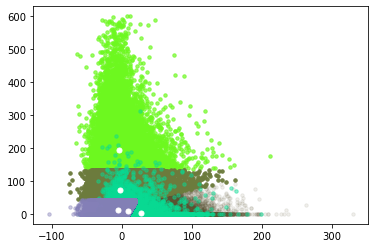

In [41]:

#k = 5
no_of_clusters = 5


all_cols = clustering_dataset.loc[:,['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY']].values
            
#k-means algorithm  
kmeans = KMeans(n_clusters=no_of_clusters, n_init=5).fit(all_cols)


cluster = kmeans.labels_
print(cluster)

#centeroid per cluster
centroid_seeds = kmeans.cluster_centers_
print(centroid_seeds)

# It is important because each choice of centroid may lead to a different cluster 
# and it helps to improve cluster results in cases when initially chosen centroid 
# are closer to final cluster center.
    
fig, plts = plt.subplots()



for index in range(no_of_clusters) :
    split = np.array([all_cols[i] for i in range(len(all_cols)) if cluster[i] == index])
    if len(split) == 0 :
        continue
    colors = np.random.rand(4)
    plts.scatter(split[:,0], split[:,2], s = 12, color = colors,label = "c" )
plts.scatter(centroid_seeds[:,0], centroid_seeds[:,2], marker = '.', s = 100, color = '#FFFFFF')

#new column "CLUSTER" creation and addition to clustering_dataset

result = [0]*len(cluster)
for i in range(len(cluster)):
    result[i] = "c%s"%str(cluster[i]+1)
    
clusters_np = np.array(result)
clustering_dataset = clustering_dataset.assign(CLUSTER = clusters_np)
print(clustering_dataset["CLUSTER"].tail(5))



    Your answer:
    

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

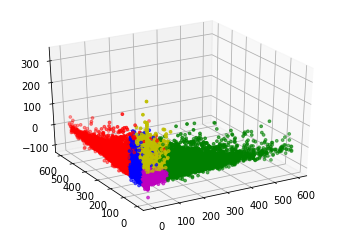

In [42]:


color_map = {0 : 'r',
                   1 : 'y',
                   2 : 'b',
                   3 : 'g',
                   4 : 'm'
                   }

l_colors = [color_map[l] for l in cluster]

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.rcParams['figure.figsize'] = (10, 10)

zdata = all_cols[:,0]#'AIR_TIME_DELAY' 
xdata = all_cols[:,1]#'WEATHER_DELAY'
ydata = all_cols[:,2]#'LATE_AIRCRAFT_DELAY'



ax.scatter3D(xdata, ydata, zdata, marker=".", c=l_colors,  s=30);


ax.view_init(30, -120)


    Your answer:
    